In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import dask.dataframe as dd

In [2]:
df = dd.read_csv('results/*.csv').compute()

In [3]:
df.head()

,chunk_size,dataset_size,num_nodes,operation,runtime,worker_per_node
0,8MB,8.85 MB,1,global_mean,0.069896,1
1,8MB,8.85 MB,1,temporal_mean,0.033520,1
2,8MB,8.85 MB,1,climatology,0.167297,1
3,8MB,8.85 MB,1,anomaly,0.144948,1
4,16MB,16.72 MB,1,global_mean,0.042919,1


In [4]:
len(df)

1176

In [5]:
clean_df = df.groupby(['chunk_size', 'dataset_size', 'num_nodes', 'operation', 'worker_per_node']).median()
clean_df.head()

runtime
chunk_size dataset_size num_nodes operation     worker_per_node          
128MB      1.02 GB      4         anomaly       2                3.732241
                                  climatology   2                0.301695
                                  global_mean   2                0.204346
                                  temporal_mean 2                0.174054
                        8         anomaly       1                3.815895

In [6]:
def plot_results(res, operation='anomaly', worker_per_node=1):
    fig, ax = plt.subplots(figsize=(10, 6))
    chunk_sizes = res.index.get_level_values('chunk_size').unique()
    for cs, marker, color in zip(chunk_sizes, ['s', 'o', '^', '*', '>', 'D', '+'], 
                                 ['#1f77b4', '#ff7f0e', '#239B56', '#2874A6', '#873600', '#AF7AC5', '#34495E']):
        
        res.loc[cs, :, :, operation, worker_per_node].reset_index() \
           .plot(x='num_nodes', y='runtime', kind='scatter',
                                                          ax=ax, label=f'{operation} cs={cs} wpn={worker_per_node}',
                                                          color=color,marker=marker, s=50)
    ax.legend()
    ax.set_ylabel('runtime (s)')
    ax.set_xlabel('Num of nodes')
    ax.grid()
    return fig, ax

In [7]:
def plot_all(df, **kwargs):
    ops = df.index.get_level_values('operation').unique()
    for op in ops:
        plot_results(df, op, **kwargs)
    

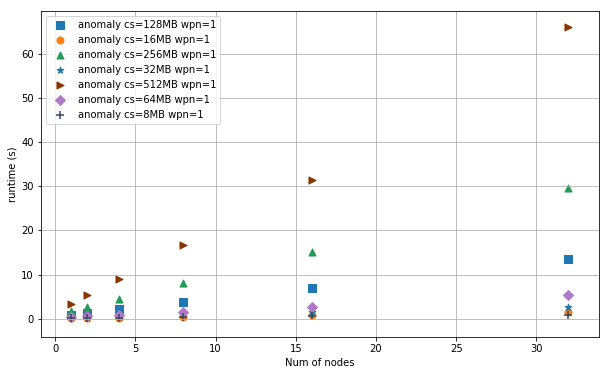

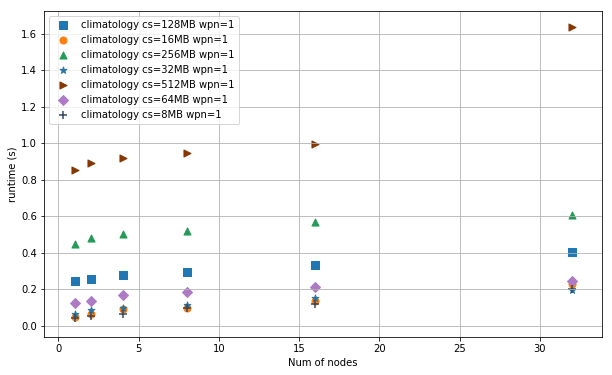

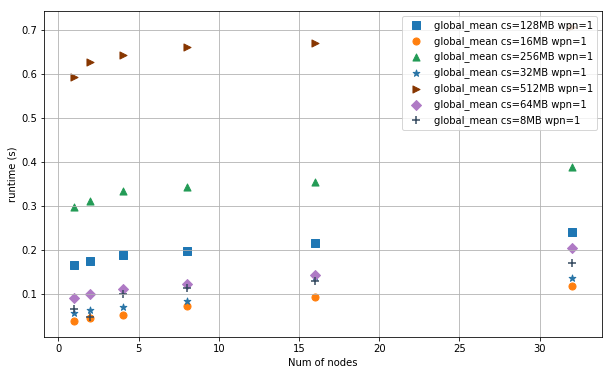

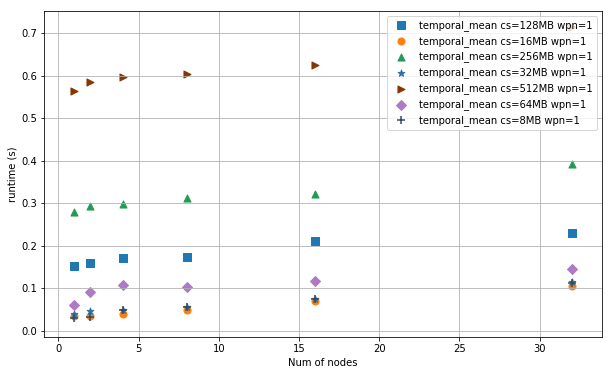

In [8]:
plot_all(clean_df, worker_per_node=1)

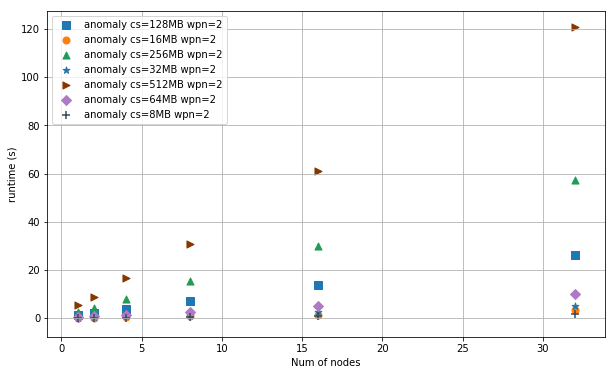

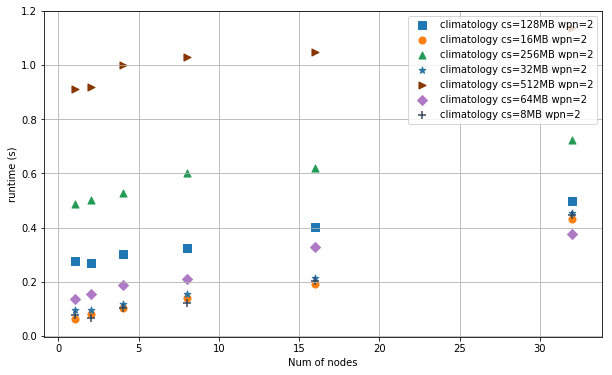

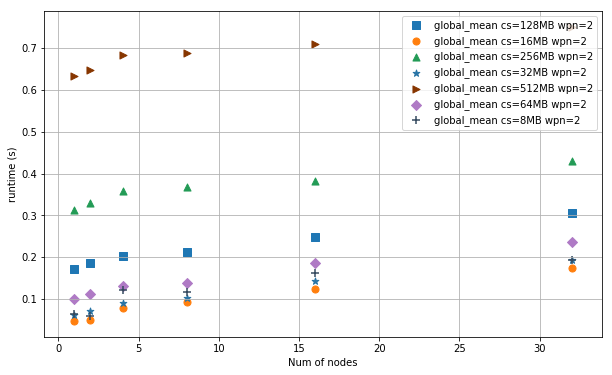

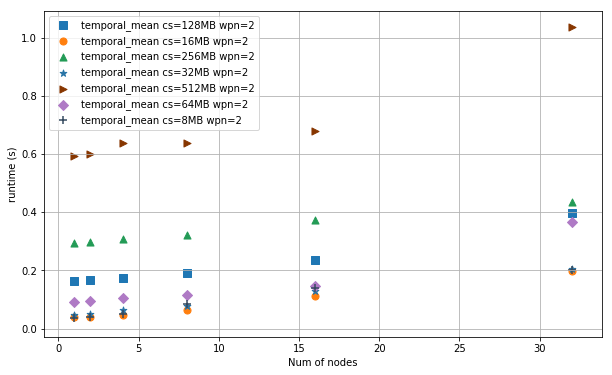

In [9]:
plot_all(clean_df, worker_per_node=2)

In [10]:
%load_ext watermark
%watermark --iversion -g  -m -v -u -d

matplotlib 3.0.2
pandas     0.24.1
dask       1.1.5
last updated: 2019-05-05 

CPython 3.6.7
IPython 7.1.1

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : cce5602c5f9720a1fe3d6cc5edec861d15258962
